In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from pathlib import Path
list_dir=['/kaggle/working/csv/','/kaggle/working/output_data/']
for dir_path in list_dir:
    Path( dir_path ).mkdir( parents=True, exist_ok=True )

In [ ]:
import json
import pandas as pd

data_file_path = "/kaggle/input/swiggy-restaurants-dataset/data.json"
ouput_csv_path = "/kaggle/working/csv/"
f = open(data_file_path)  # open the json file
data = json.load(f)  # load as json
f.close()
a = 1
for city, city_detail in data.items():
    if not isinstance(city_detail, dict):
        continue
    for region, region_detail in city_detail.items():
        if not isinstance(region_detail, dict):
            continue
        if "restaurants" not in region_detail.keys():

            #print(f"processed city:{city} region: {region}")
            #print(region_detail.keys())
            # print(region_detail[list(region_detail.keys())[0]].keys())
            df = pd.DataFrame(region_detail).T
            # raise

        else:
            df = pd.DataFrame(region_detail["restaurants"]).T
        try:
            df.index.name = "id"
            df["city"] = city
            df["region"] = region
            df.to_csv(
                f"{ouput_csv_path}data_{city.strip().lower().replace('/', '_')}__{region.strip().lower().replace('/', '_')}.csv",
                sep=",",
                encoding="utf-8",
            )
            #print(f"processed city:{city} region: {region}")
        except Exception as ex:
            print(f"processed city:{city} region: {region}")
            print(f"{region_detail.keys()}")
            print(f"{region_detail['restaurants'].keys()}")
            raise Exception(ex)
            

In [ ]:
import glob
import pandas as pd

path = "/kaggle/working/csv/*.csv"

files = glob.glob(path)
print(len(files))

highest_rating = {}
highest_rating_df = {}
big_df = pd.DataFrame({})

for file_name in files:
    df = pd.read_csv(file_name)

    print(f"file name: {file_name}")
    big_df = pd.concat([big_df, df], ignore_index=True)
big_df.to_csv("/kaggle/working/output_data/big_csv.csv")

In [1]:
from cgitb import reset
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/working/output_data/big_csv.csv")

In [2]:
def highest_rating_rest(df):
    """
    Restaurant with Maximum rating throughout the dataset
    """
    df = df[df.rating != "--"]
    df = df[~df["rating"].isnull()]
    df["rating"] = pd.to_numeric(df["rating"])
    print(df["rating"].max())
    df = df[df.rating == 5.0]
    print(df.head())
    df.to_csv("/kaggle/working/output_data/highest_rating_restaurant_q1.csv")
highest_rating_rest(df)

5.0
      Unnamed: 0      id                   name  rating rating_count   cost  \
542          542  558839          HRX by Eatfit     5.0  20+ ratings  ₹ 270   
832          832  538370  Paratha Box by EatFit     5.0  20+ ratings  ₹ 250   
1066        1066  532251               Bento It     5.0  50+ ratings  ₹ 500   
1333        1333  518545           GULLY  RESTO     5.0  20+ ratings  ₹ 400   
2036        2036  528301         Manheer Bakery     5.0  20+ ratings  ₹ 150   

                                                address  \
542   HRX by Eatfit, SHOP NO 1&2 GROUND FLOOR C T S ...   
832   Paratha Box by EatFit, SHOP NO 1&2 GROUND FLOO...   
1066  Bento It, 1st Floor, HIG-A-48, HMI Towers, APH...   
1333  GULLY  RESTO, B-58,APHB COLONY,GACHIBOWLY,HYDE...   
2036  Manheer Bakery, 776, Sector-1, Vikas Nagar, Ti...   

                    cuisine          lic_no  \
542     Healthy Food,Salads  11522037000384   
832    North Indian,Punjabi  11522037000384   
1066           Asian,Kore

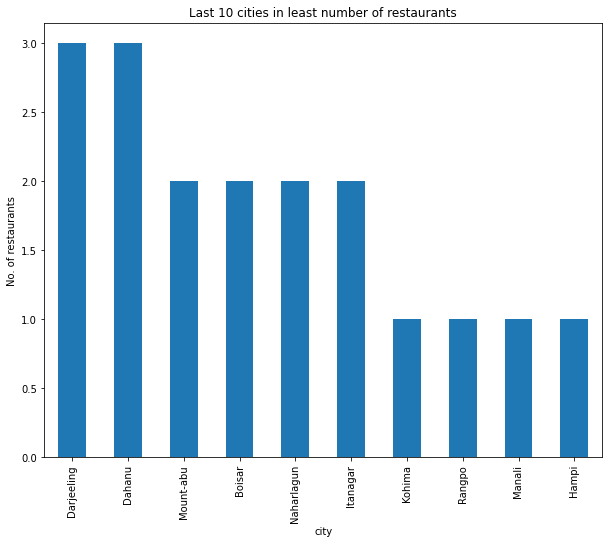

In [6]:
def cities_with_least_num_restaurants(df):
    """
    Number of cities with least number of restaurants listed : 4
    # Itanagar         2
    # Kohima           1
    # Rangpo           1
    # Manali           1
    # Hampi            1
    """
    #result = df["city"].value_counts()
    #print(type(result))
    #print(result[-10:])
    
    df.sort_values('city',inplace=True)
    top_10 = df['city'].value_counts()[-10:]
    top_10.plot(kind='bar',figsize=(10,8))
    plt.xlabel('city')
    plt.ylabel('No. of restaurants')
    plt.title('Last 10 cities in least number of restaurants')

cities_with_least_num_restaurants(df)


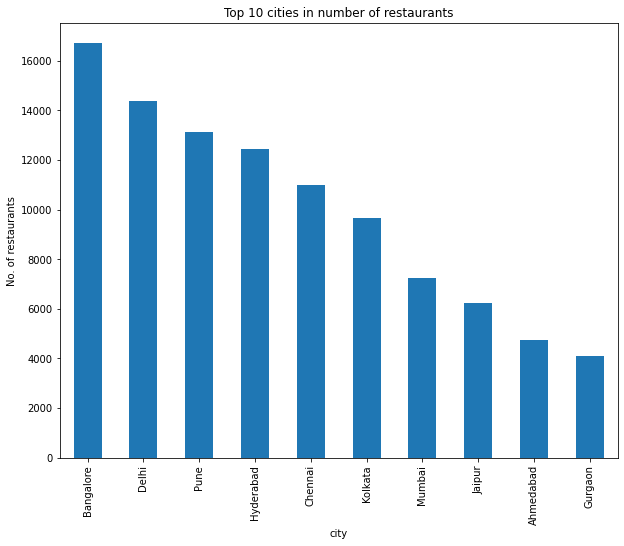

In [7]:
def top_10_cities_with_num_restaurants(df):
    """
    Top 10 cities as per the number of restaurants listed? :
    Bangalore    16701
    Delhi        14386
    Pune         13145
    Hyderabad    12439
    Chennai      10987
    Kolkata       9651
    Mumbai        7221
    Jaipur        6250
    Ahmedabad     4736
    Gurgaon       4106
    """
    #result = df["city"].value_counts()
    #print(type(result))
    #print(result[:10])
    
    top_10 = df['city'].value_counts()[:10]
    top_10.plot(kind='bar',figsize=(10,8))
    plt.xlabel('city')
    plt.ylabel('No. of restaurants')
    plt.title('Top 10 cities in number of restaurants')
    
top_10_cities_with_num_restaurants(df)




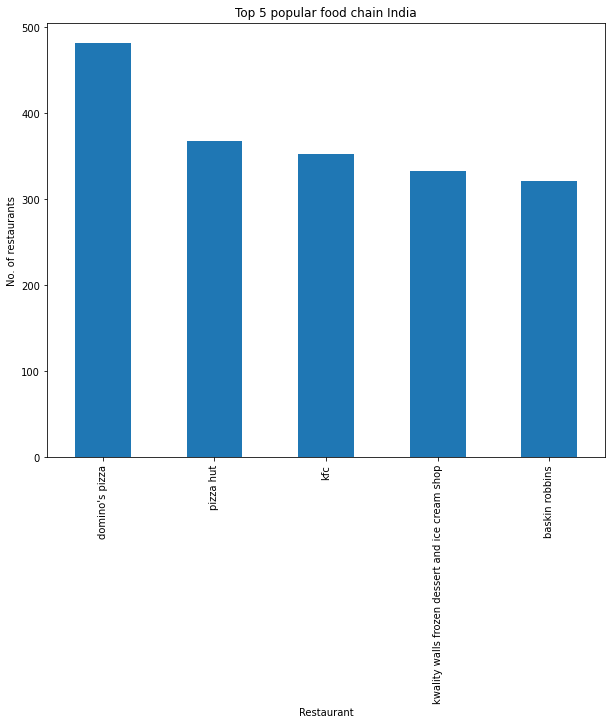

In [9]:
def top_5_popular_food_chain_india(df):
    """
    Top 5 most popular restaurant chains in India?? :
    domino's pizza                                        481
    pizza hut                                             367
    kfc                                                   352
    kwality walls frozen dessert and ice cream shop       333
    baskin robbins                                        321
    """
    df["name"] = df["name"].apply(lambda x: str(x).strip().lower())
    # df = df[df["name"].str.contains("domino")]
    #result = df["name"].value_counts()
    #print(type(result))
    #print(result[:50])
    
    top_5 = df['name'].value_counts()[:5]
    top_5.plot(kind='bar',figsize=(10,8))
    plt.xlabel('Restaurant')
    plt.ylabel('No. of restaurants')
    plt.title('Top 5 popular food chain India')
    
top_5_popular_food_chain_india(df)


truffles            6
leon grill          1
the bowl company    1
meghana foods       1
Name: name, dtype: int64
5000


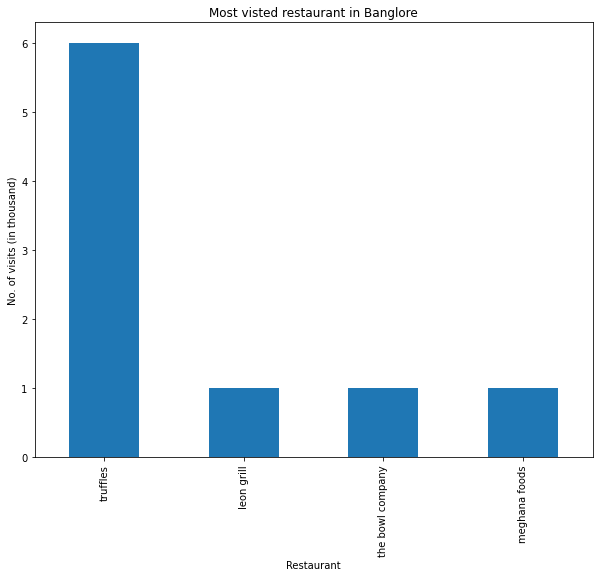

In [14]:
def most_visted_restaurant_in_banglore(df):
    """
    Which restaurant in Banglore has the most number of people visited? :
    truffles            6*5k

    """
    df["city"] = df["city"].apply(lambda x: str(x).strip().lower())

    # we will only take rows where city is bangalore
    df = df[df.city == "bangalore"]

    # drop the rows where rating_count is nan
    df = df[~df["rating_count"].isnull()]

    # converting all reatings into lower case
    df["rating_count"] = df["rating_count"].apply(
        lambda x: str(x).strip().lower()
    )
    # we remove the rows where rating_count is too few ratings
    df = df[~df["rating_count"].str.contains("few")]

    # no we want to separate interger and  string part of the rating_count and replace first part only k with 1000 and convert it to int
    df["rating_count"] = df["rating_count"].apply(
        lambda x: int(str(x).strip().lower().split("+")[0].replace("k", "000"))
    )
    # find out the maximum rating_count
    result = df["rating_count"].max()

    df = df[df["rating_count"] == result]
    df["name"] = df["name"].apply(lambda x: str(x).strip().lower())
    print(df["name"].value_counts())
    print(result)
    top_5 = df['name'].value_counts()[:5]
    top_5.plot(kind='bar',figsize=(10,8))
    plt.xlabel('Restaurant')
    plt.ylabel('No. of visits (in thousand)')
    plt.title('Most visted restaurant in Banglore')
    

most_visted_restaurant_in_banglore(df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


leas_expensive cost ₹ 1
mumbai         7
pune           5
bangalore      4
lucknow        4
kolkata        4
chandigarh     4
chennai        4
gurgaon        2
biharsharif    2
delhi          2
erode          1
modinagar      1
vijayawada     1
tirupur        1
theni          1
sikar          1
nagpur         1
muzaffarpur    1
ludhiana       1
madurai        1
faridkot       1
kollam         1
kanpur         1
kakinada       1
jhunjhunu      1
hyderabad      1
hapur          1
gorakhpur      1
wardha         1
Name: city, dtype: int64


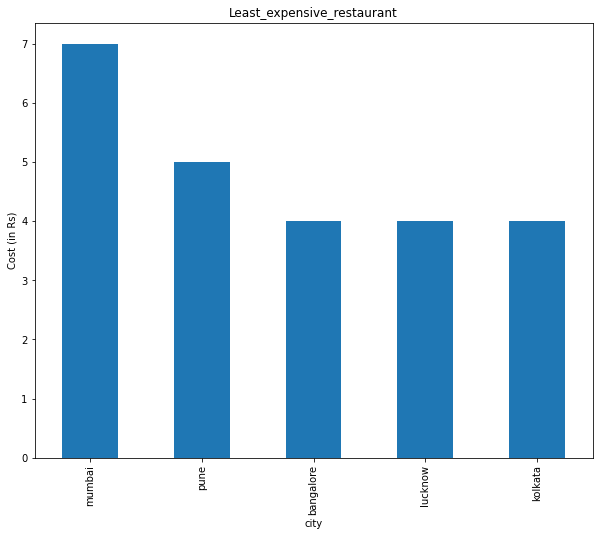

In [15]:
# Which city is having the least expensive restaurant in terms of cost?


def least_expensive_restaurant(df):
    """
    # Which city is having the least expensive restaurant in terms of cost?

    Mumbai         7

    """
    # remove cost rows where it is nan or null
    df = df[~df["cost"].isnull()]
    # cleaning cost becaus it is in string
    df["cost"] = df["cost"].apply(lambda x: str(x).strip().lower())
    # find least expensive restaurant
    min_cost = df["cost"].min()

    df = df[df["cost"] == min_cost]
    print("leas_expensive cost", min_cost)
    print(df["city"].value_counts())
    
    top_5 = df['city'].value_counts()[:5]
    top_5.plot(kind='bar',figsize=(10,8))
    plt.xlabel('city')
    plt.ylabel('Cost (in Rs)')
    plt.title('Least_expensive_restaurant')


least_expensive_restaurant(df)


In [16]:
# Most popular Cuisines served throughout the dataset?
def most_pupular_cousine_in_dataset(df):
    """
    Most popular Cuisines served throughout the dataset?
    chinese
    """
    list_of_cuisine = []
    cuisines = []
    resul_dict = {}
    # remove cost rows where it is nan or null
    df = df[~df["cuisine"].isnull()]

    # cleaning cost becaus it is in string
    df["cuisine"] = df["cuisine"].apply(lambda x: str(x).strip().lower())

    normal_count = df["cuisine"].value_counts()
    print(type(normal_count))

    for cus, value in normal_count.items():

        small_list = [str(c).strip() for c in cus.split(",")]
        for item in small_list:
            total_val = resul_dict.get(item, 0) + value

            resul_dict[item] = total_val
        # resul_dict.update({item:value for item in small_list})

    #print(resul_dict)
    print("most popular cusine in dataset")
    print(max(resul_dict, key=resul_dict.get))


most_pupular_cousine_in_dataset(df)


<class 'pandas.core.series.Series'>
most popular cusine in dataset
chinese


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
